# P5. Duolingo EDA and Visualization

Exploratory data analysis (EDA) is an approach for summarizing and visualizing the important characteristics of a data set. It gives us more understanding of the data’s underlying structure and variables before feature engineering, formal modeling, model tuning, and other data analysis techniques. In this mini project, you will be introduced to some ways to explore data efficiently with different packages so that you can develop intuition about your data set:
* Import and briefly check data with python data manipulation tools Pandas
* Get basic description of data, descriptive statistics, checking rows and columns.
* Time series analysis
* Simple predictive modeling
* Discover patterns in data by visualizing data with python data visualization packages sucha as Matplotlib, and Seaborn, or by using functions to compute the correlation between features.

### General Philosophy and Steps for this project
 - Data preparation: load all needed dependencies and packages, setup plot style
 - Data Import: load data to pandas dataframe and check
 - Post questions: propose hypothesis based on your intuition
 - Visualization: Test you intuition and hypothesis using python visualization packages, such as Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import datetime as dt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Import data 

In [3]:
df = pd.read_csv('learning_traces.csv', nrows=1000000)

In [4]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
p_recall             1000000 non-null float64
timestamp            1000000 non-null int64
delta                1000000 non-null int64
user_id              1000000 non-null object
learning_language    1000000 non-null object
ui_language          1000000 non-null object
lexeme_id            1000000 non-null object
lexeme_string        1000000 non-null object
history_seen         1000000 non-null int64
history_correct      1000000 non-null int64
session_seen         1000000 non-null int64
session_correct      1000000 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 91.6+ MB


In [6]:
df.shape

(1000000, 12)

#### Please try to answer the following questions with data visualization:

 - How many users are there from every country?
 - How many different languages are being studied
 - Are there differences between users from different coutries
 - Time series analysis 
     - temporal behaviour of users
     - when do people study?
     - how often do they study
     - timestamp
 - Predictive modelling
     - corellations of p_recall with various features    

## Numerical data

In [7]:
# list all types that only take numerical ones
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

### What are the mean values of p_recall among the ui_language groups using bar plot

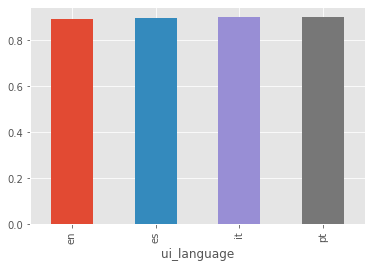

In [8]:
df.groupby('ui_language')['p_recall'].mean().plot.bar()

**This bar plot showed us that there is no obvious difference between the average p_recall values among the different ui_language groups**

### 1. Create a dataframe that only takes numerical data and show the head

In [9]:
num_feature = df.select_dtypes(include = ['float64', 'int64'])
num_feature.head()

,p_recall,timestamp,delta,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,6,4,2,2
1,0.5,1362076081,27649635,4,4,2,1
2,1.0,1362076081,27649635,5,4,1,1
3,0.5,1362076081,27649635,6,5,2,1
4,1.0,1362076081,27649635,4,4,1,1


### 2. Draw the histgram of df_num

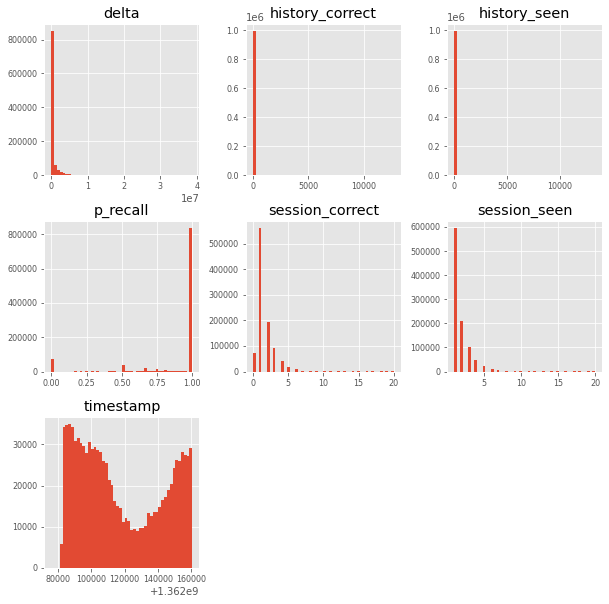

In [10]:
num_feature.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

**This histogram showed us the timestamp has a clear time pattern in terms of the user amount**

## Feature to feature relationship

Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

### 3. Compute pairwise correlation of numerical columns and draw a heatmap using seaborn plot
* Method of correlation:
    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation

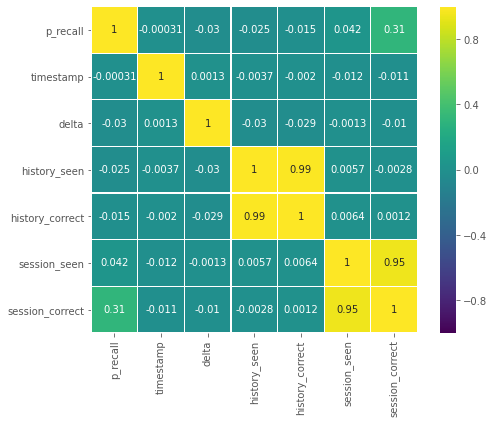

In [46]:
corr = num_feature.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);

#### Notes:  We can see here histroy_seen and histroy_correct, session_seen and session_correct, they both have pretty high correlation with each other. It verifies out common sense that the more you see, the higher probability you can do correctly. 

## Categorical data - Countries

### 1. What are user interface languages

In [47]:
df['ui_language'].unique()
# en: english pt: Português es: spanish it: Italian

array(['en', 'pt', 'es', 'it'], dtype=object)

### 2. Do a value counts

In [48]:
df['ui_language'].value_counts()

en    598123
es    298705
pt     72876
it     30296
Name: ui_language, dtype: int64

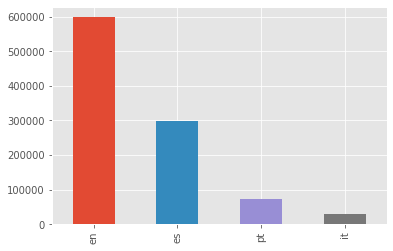

In [14]:
df['ui_language'].value_counts().plot.bar()

**We can clearly see the amount of ui_language of each user group**

### 3. Draw a pie plot to visualize user interface language distribution with percentage on it

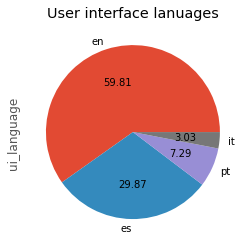

In [15]:
df['ui_language'].value_counts().plot.pie(autopct='%1.2lf')
plt.title('User interface lanuages')
plt.show()

**En is the major ui_language and the Es is the second. Only a few users are using it and pt as their ui_language**

### 4. Draw a pie plot of languages that individuals are learnging

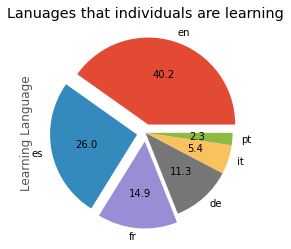

In [16]:
df['learning_language'].value_counts().plot.pie(autopct='%1.1lf',explode=[0.1,0.1,0.1,0,0,0])
plt.title('Lanuages that individuals are learning')
plt.ylabel('Learning Language')
plt.show()

### 5. Pie plot to visualize what languages being learned by people whose interface language is English

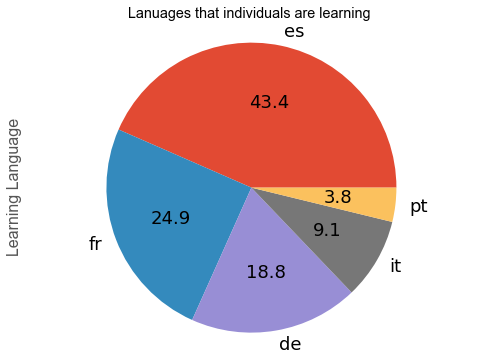

In [17]:
plt.figure(figsize=(8, 6))
df[df.ui_language == 'en']['learning_language'].value_counts().plot.pie(autopct='%1.1lf',fontsize=18)
plt.title('Lanuages that individuals are learning',fontname='Arial')
plt.axis('equal')
plt.ylabel('Learning Language',fontname='Arial',fontsize=16)
plt.show()

**Es and Fr and the two major language learned by the users**

### 6. Let's see what languages being learned by people whose interface languages are English, Spanish, Italian, and Potuguese by subplot four pie plots

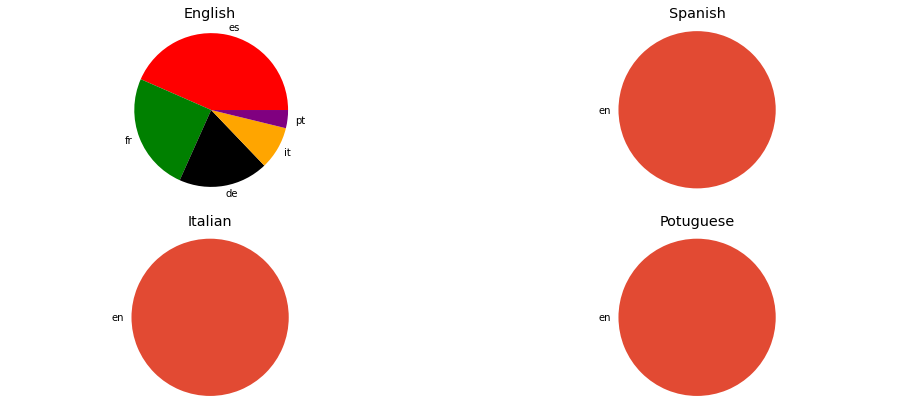

<Figure size 1296x720 with 0 Axes>

In [18]:
fig, ax = plt.subplots(2,2,figsize=[16, 7])
plt.figure(figsize=(18, 10))
ax[0][0].pie(df[df.ui_language == 'en']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'en']['learning_language'].value_counts().index,
            colors=['red','green','black','orange','purple'])
ax[0][0].set_title('English')
ax[0][0].axis('equal')

ax[0][1].pie(df[df.ui_language == 'es']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'es']['learning_language'].value_counts().index)
ax[0][1].set_title('Spanish')
ax[0][1].axis('equal')

ax[1][0].pie(df[df.ui_language == 'it']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'it']['learning_language'].value_counts().index)
ax[1][0].set_title('Italian')
ax[1][0].axis('equal')


ax[1][1].pie(df[df.ui_language == 'pt']['learning_language'].value_counts(),
            labels=df[df.ui_language == 'pt']['learning_language'].value_counts().index)
ax[1][1].set_title('Potuguese')
ax[1][1].axis('equal')

plt.show()

**Notes**: It is quite straightforward that English speakers are learning other languages, and Spanish, Italian, Potuguses speakers are learning only English

#### Pie Chart Pros and Cons
Pros: 
* Easy to See Large Disparities in Data
* Can Emphasize Data When There Are Only a Few Units
* Easy to see the domination if there's any

Cons:
* Cannot Compare More Than A Few Pieces of Data
* Unhelpful When Observing Trends Over Time
* When you have many slices, hard to tell the percentage of each slices
* You can't tell the difference in percentage of slices if there's little between two pie charts

In [19]:
df[df.ui_language == 'en']['learning_language'].value_counts().index

Index(['es', 'fr', 'de', 'it', 'pt'], dtype='object')

## Users Activity patterns

### 1. Let's see users activity in session by doing a value counts and do a summary statistics

In [20]:
df['user_id'].value_counts()

u:ia1J    2041
u:bcH_    1531
u:eMgB    1233
u:wpZ     1230
u:gp3v    1037
u:hCqJ    1033
u:im5y    1009
u:ht1n     960
u:dzpv     927
u:f-Z-     913
u:gZJc     906
u:ixca     888
u:ijBO     866
u:gWfj     834
u:haQU     824
u:faRp     823
u:feG3     823
u:h2CV     815
u:gjya     797
u:gCIc     777
u:f9KA     755
u:hv7d     743
u:ikE6     730
u:dOhF     728
u:fFed     726
u:iJkI     721
u:flac     718
u:NPs      717
u:hZJC     716
u:hdrp     702
          ... 
u:g6Sv       1
u:g0oN       1
u:huUw       1
u:bpDB       1
u:daYL       1
u:hhxH       1
u:iGca       1
u:heu0       1
u:dKph       1
u:g8gc       1
u:ivbc       1
u:h5cM       1
u:hpXU       1
u:gPZn       1
u:ip4-       1
u:hw35       1
u:gKqC       1
u:bPn6       1
u:gPxc       1
u:eQRf       1
u:iAJl       1
u:hbHT       1
u:gZy        1
u:ggtq       1
u:f6sq       1
u:h-Le       1
u:cHEj       1
u:hZrW       1
u:imHm       1
u:eS2J       1
Name: user_id, Length: 20204, dtype: int64

In [21]:
user_activity = df['user_id'].value_counts()
user_activity.describe()

count    20204.000000
mean        49.495149
std         74.911279
min          1.000000
25%          8.000000
50%         26.000000
75%         59.000000
max       2041.000000
Name: user_id, dtype: float64

### 2. Compute the duration of dataset

In [22]:
duration = df.groupby('user_id') \
    .apply(lambda x: (x['timestamp'].max() - x['timestamp'].min())/3600.0).to_frame()

In [23]:
activity_df = df['user_id'].value_counts().to_frame().merge(duration, how = 'inner', left_index = True, right_index = True, copy = False)
activity_df = activity_df.reset_index()
activity_df.columns = ['user_id','entries', 'duration']

In [24]:
df = df.merge(activity_df,how="left",on='user_id')

In [25]:
df['activity'] = df[['entries','duration']].apply(lambda x:x[0]/x[1] if x[1]!=0 else 0,axis=1)

In [26]:
# User's daily activity hour
duration = (df.timestamp.max() - df.timestamp.min())/3600.0
print('Duration of dataset is ' + str(duration) + 'hours')

Duration of dataset is 23.500555555555554hours


## Boxplots

### Compare activity levels for people with different 4 user interface languages by drawing boxplots

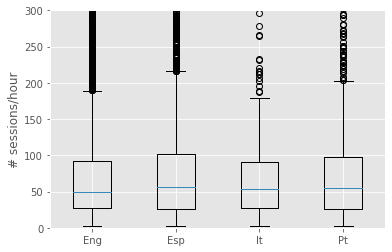

In [27]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['activity'].value_counts(),
            df[df.ui_language == 'es']['activity'].value_counts(),
            df[df.ui_language == 'it']['activity'].value_counts(),
            df[df.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.ylim(0,300)
plt.show()

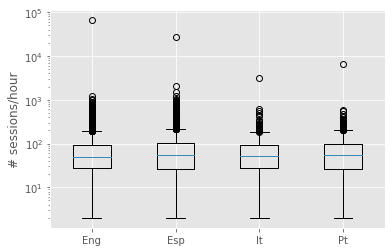

In [28]:
plt.figure()
plt.boxplot([df[df.ui_language == 'en']['activity'].value_counts(),
            df[df.ui_language == 'es']['activity'].value_counts(),
            df[df.ui_language == 'it']['activity'].value_counts(),
            df[df.ui_language == 'pt']['activity'].value_counts()])
plt.xticks([1,2,3,4],['Eng','Esp','It','Pt'])
plt.ylabel('# sessions/hour')
plt.yscale('log')
plt.show()

## Regression and predictive tasks

In [29]:
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182


**Notes**: With common sense, we know that the more, the better. So let's draw the scatter plot to see whether or not our common sense is correct. 

### 1. Scatter plot the relation between session_seen and p_recall

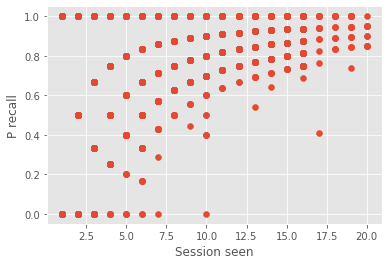

In [30]:
plt.figure()
plt.scatter(df.session_seen, df.p_recall)
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

### 2. Scatter plot the same distribution with log scale. 

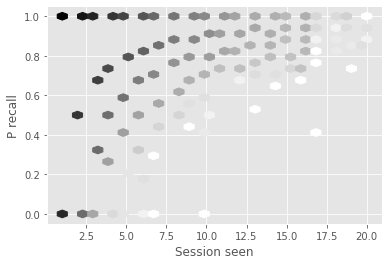

In [31]:
plt.figure()
plt.hexbin(df.session_seen, df.p_recall,gridsize=30,bins='log', mincnt=1, cmap='binary')
plt.xlabel('Session seen')
plt.ylabel('P recall')
plt.show()

### 3. Goupby session_seen and take aveage on it, and scatter plot relation with p_recall

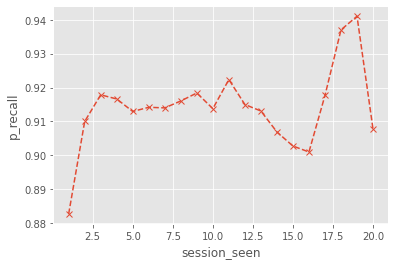

In [32]:
plt.plot(df.groupby('session_seen').mean()['p_recall'],'x--')
plt.xlabel('session_seen')
plt.ylabel('p_recall')
plt.show()

**The average p_recall is fairly steady against session seen**

### 4. Goupby history_seen and take aveage on it, and scatter plot relation with p_recall

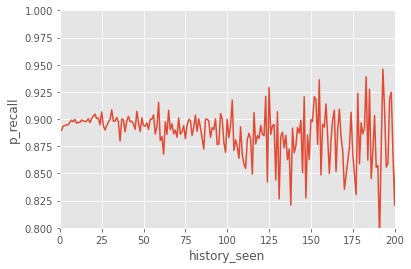

In [33]:
plt.plot(df.groupby('history_seen').mean()['p_recall'])
plt.xlim(0,200)
plt.ylim(0.8,1)
plt.xlabel('history_seen')
plt.ylabel('p_recall')
plt.show()

### 5. Create a dataframe with user_id and user_activity based on user_id index

#### In order to see user_activity and other features relationship, we add user_activity column here for later visualization

In [34]:
a = pd.DataFrame()
a['user_id'] = user_activity.index
a['user_activity'] = user_activity.values
a.head()

,user_id,user_activity
0,u:ia1J,2041
1,u:bcH_,1531
2,u:eMgB,1233
3,u:wpZ,1230
4,u:gp3v,1037


### 6. Merge dataframe a onto original dataframe

In [35]:
df = df.merge(a,on='user_id',how='inner')
df.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,entries,duration,activity,user_activity
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2,31,1.752222,17.69182,31
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1,31,1.752222,17.69182,31
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1,31,1.752222,17.69182,31
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1,31,1.752222,17.69182,31
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1,31,1.752222,17.69182,31


### 7. Scatter plot relation between user_activity and delta

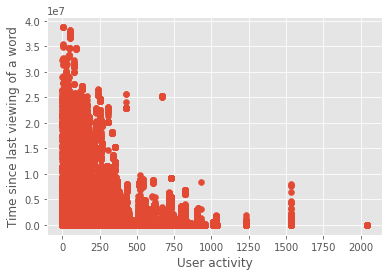

In [36]:
plt.scatter(df.user_activity, df.delta)
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

**There is a negative correlation between time delta and user activity which makes sense because the more active a user is, the less time delta between each time the word is seen.**

### 8. Hexbin plot the relation between user_activity and delta with log scale

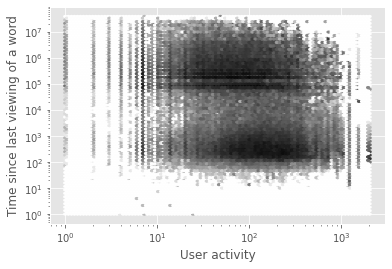

In [37]:
plt.hexbin(df.user_activity, df.delta,xscale='log',yscale='log',bins='log', cmap='binary')
plt.xlabel('User activity')
plt.ylabel('Time since last viewing of a word')
plt.show()

## Temporal patterns and Time Series

### 1. Plot the general all users activity pattern to see what time people are pretty active during a day

In [38]:
np.round((df.timestamp - df.timestamp.min())/60.0,0).value_counts()

146.0     1624
436.0     1557
211.0     1551
199.0     1528
176.0     1507
393.0     1471
282.0     1463
207.0     1462
151.0     1460
195.0     1448
1390.0    1436
166.0     1435
170.0     1429
159.0     1425
138.0     1424
132.0     1418
278.0     1413
134.0     1413
131.0     1409
1408.0    1406
205.0     1405
154.0     1399
234.0     1391
244.0     1388
171.0     1386
283.0     1384
376.0     1376
137.0     1361
202.0     1360
128.0     1360
          ... 
929.0      229
828.0      225
788.0      224
849.0      221
720.0      203
837.0      202
850.0      202
877.0      195
803.0      195
944.0      193
723.0      191
825.0      191
1024.0     188
907.0      187
937.0      187
898.0      186
719.0      179
798.0      175
871.0      175
791.0      171
892.0      170
846.0      166
107.0      118
103.0       31
99.0         8
105.0        7
0.0          7
104.0        6
102.0        4
101.0        1
Name: timestamp, Length: 1311, dtype: int64

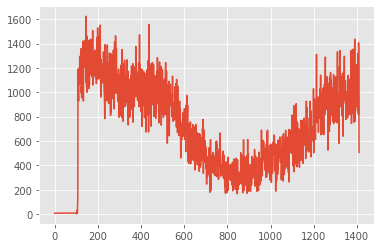

In [39]:
plt.plot(np.round((df.timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index())

**See the general pattern of the users amount in minutes**

### 2. Visualize each interface language users daily activity pattern onto a single plot in the first day. 

In [40]:
# You can use datetime library to convert timestamp to actual datetime
dt.datetime.fromtimestamp(df.timestamp.min())

datetime.datetime(2013, 2, 28, 12, 28, 1)

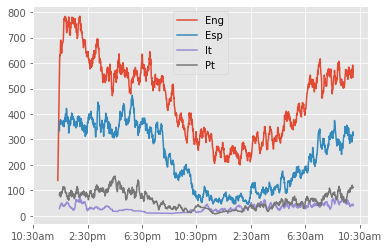

In [41]:
win = 10 ## set the window as 10 min
hours = 60
plt.plot(pd.Series(np.round((df[df.ui_language == 'en'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'es'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'it'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.plot(pd.Series(np.round((df[df.ui_language == 'pt'].timestamp - df.timestamp.min())/60.0,0).value_counts().sort_index()).rolling(window=win).mean())
plt.legend(['Eng','Esp','It','Pt'])
plt.xticks([0,4*hours,8*hours,12*hours,16*hours,20*hours,24*hours],['10:30am','2:30pm','6:30pm','10:30pm','2:30am','6:30am','10:30am'])
plt.show()

**We can see clear timing pattern in the graph. Fewer users use the app in the evening and more users during the day**